In [ ]:
#EDA2                                         CAR SALE DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Car Sale.csv')
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


Top 10 Dealers by Average Selling Price:
                         Dealer_Name  Average Price ($)
0                          U-Haul CO       28769.919006
1                      Classic Chevy       28602.014446
2               Rabun Used Car Sales       28527.536177
3                    Iceberg Rentals       28522.958533
4              Enterprise Rent A Car       28312.580800
5  Scrivener Performance Engineering       28297.371589
6         Gartner Buick Hyundai Saab       28247.621019
7                   Saab-Belle Dodge       28190.139888
8                        Capitol KIA       28189.703822
9                      Race Car Help       28163.372706


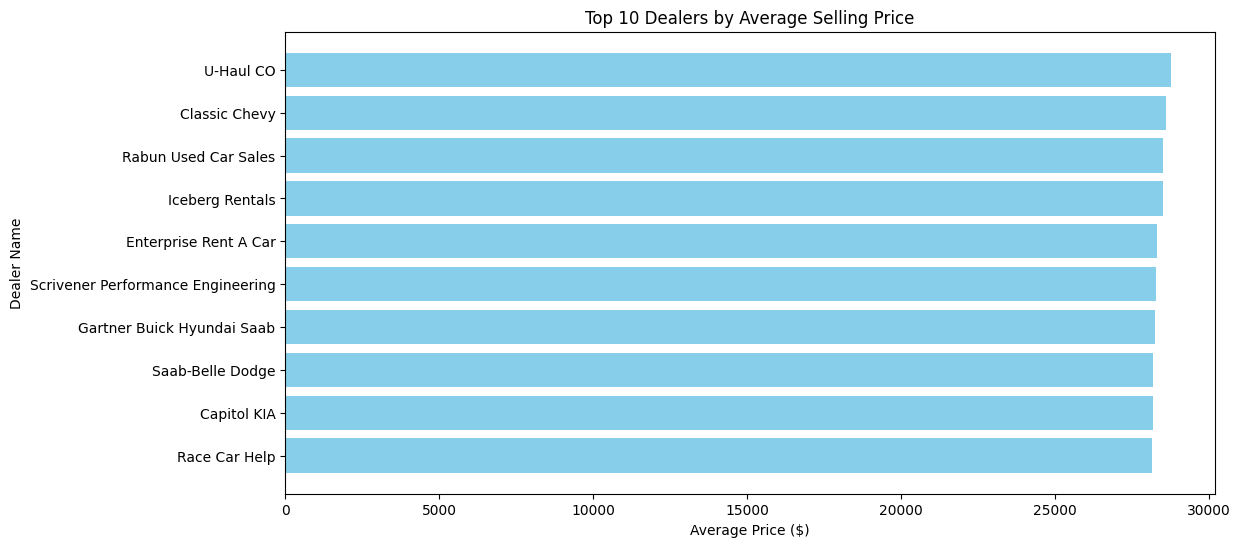

In [3]:
#Q1 What is the average selling price of cars for each dealer, and how does it compare across different dealers ?

# Calculate the average selling price for each dealer
average_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

# Convert to a DataFrame for better handling
average_price_summary = average_price_per_dealer.reset_index()
average_price_summary.rename(columns={'Price ($)': 'Average Price ($)'}, inplace=True)

# Save the result to a CSV file for reference
average_price_summary.to_csv('average_price_per_dealer.csv', index=False)

# Display the top 10 dealers by average price
print("Top 10 Dealers by Average Selling Price:")
print(average_price_summary.head(10))

# Visualization using Matplotlib
plt.figure(figsize=(12, 6))
top_10_dealers = average_price_summary.head(10)
plt.barh(top_10_dealers['Dealer_Name'], top_10_dealers['Average Price ($)'], color='skyblue')
plt.xlabel('Average Price ($)')
plt.ylabel('Dealer Name')
plt.title('Top 10 Dealers by Average Selling Price')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Interactive Visualization using Plotly
fig = px.bar(
    top_10_dealers,
    x='Average Price ($)',
    y='Dealer_Name',
    orientation='h',
    title='Top 10 Dealers by Average Selling Price',
    labels={'Dealer_Name': 'Dealer Name', 'Average Price ($)': 'Average Price ($)'},
    text='Average Price ($)'
)
fig.update_layout(yaxis=dict(autorange="reversed"))  # Reverse y-axis
fig.show()

Car brand with the highest price variation:
Company                              Lincoln
Price Standard Deviation ($)    19658.050211
Name: 0, dtype: object


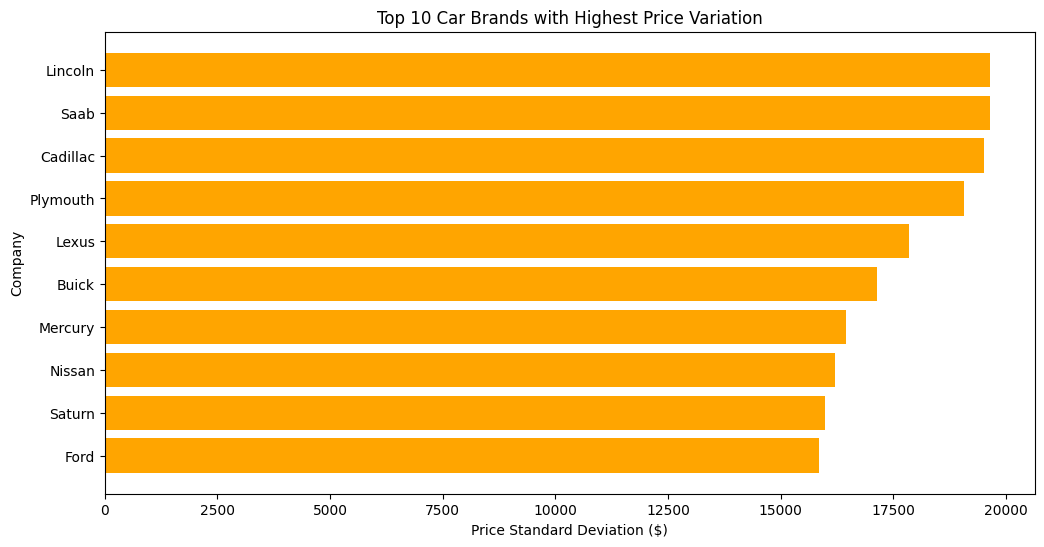


Interpretation:
A higher standard deviation in car prices for a brand suggests a wider range of car models offered by the brand,
from budget to premium options. This could indicate a diversified product lineup and targeted pricing strategies
to appeal to different market segments.



In [4]:
#Q2  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends ?
# Calculate the standard deviation of prices for each car brand (Company)
price_variation_per_company = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

# Convert to a DataFrame for better handling
price_variation_summary = price_variation_per_company.reset_index()
price_variation_summary.rename(columns={'Price ($)': 'Price Standard Deviation ($)'}, inplace=True)

# Identify the company with the highest price variation
highest_variation_company = price_variation_summary.iloc[0]

print("Car brand with the highest price variation:")
print(highest_variation_company)

# Save the result to a CSV file
price_variation_summary.to_csv('price_variation_per_company.csv', index=False)

# Visualization using Matplotlib
plt.figure(figsize=(12, 6))
top_10_variation = price_variation_summary.head(10)
plt.barh(top_10_variation['Company'], top_10_variation['Price Standard Deviation ($)'], color='orange')
plt.xlabel('Price Standard Deviation ($)')
plt.ylabel('Company')
plt.title('Top 10 Car Brands with Highest Price Variation')
plt.gca().invert_yaxis()
plt.show()

# Interactive Visualization using Plotly
fig = px.bar(
    top_10_variation,
    x='Price Standard Deviation ($)',
    y='Company',
    orientation='h',
    title='Top 10 Car Brands with Highest Price Variation',
    labels={'Company': 'Car Brand', 'Price Standard Deviation ($)': 'Price Variation ($)'},
    text='Price Standard Deviation ($)'
)
fig.update_layout(yaxis=dict(autorange="reversed"))  # Reverse y-axis
fig.show()

# Interpretation
print("""
Interpretation:
A higher standard deviation in car prices for a brand suggests a wider range of car models offered by the brand,
from budget to premium options. This could indicate a diversified product lineup and targeted pricing strategies
to appeal to different market segments.
""")

Interquartile ranges (IQR) for each transmission type:
                 0.25     0.75      IQR
Transmission                           
Manual        17000.0  34000.0  17000.0
Auto          19000.0  35500.0  16500.0


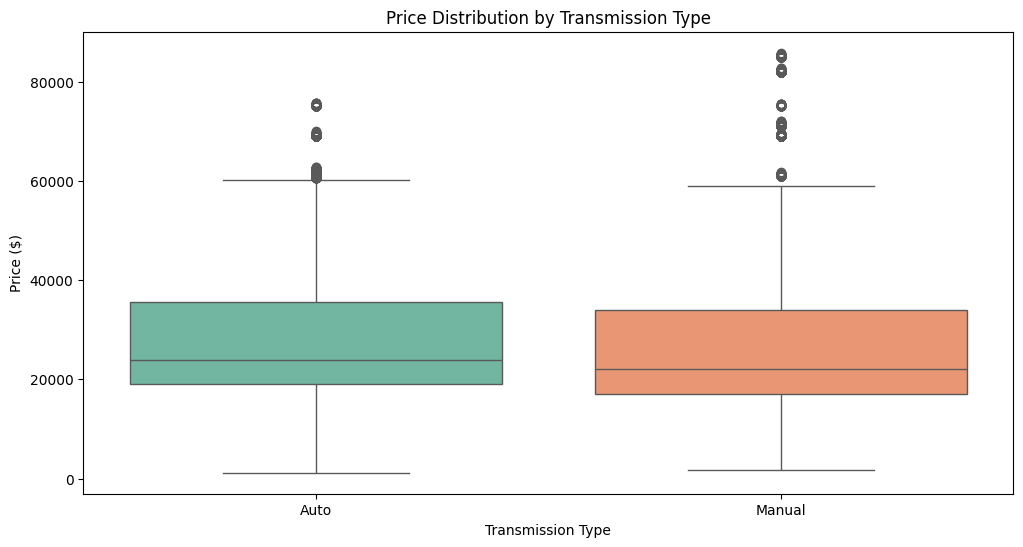

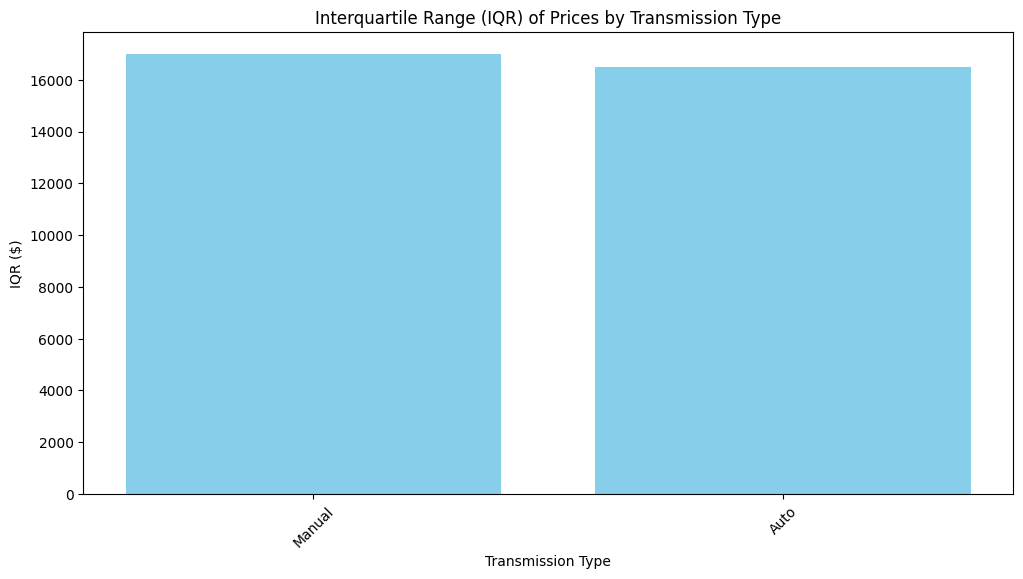


Interpretation:
1. Boxplot provides a clear visualization of the price distribution for each transmission type, highlighting 
   outliers and spread.
2. The IQR bar chart shows which transmission types have the widest range of mid-range prices, 
   indicating variability in pricing.



In [5]:
#Q3  What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare ?
# Calculate the interquartile range (IQR) for each transmission type
transmission_iqr = df.groupby('Transmission')['Price ($)'].quantile([0.25, 0.75]).unstack()
transmission_iqr['IQR'] = transmission_iqr[0.75] - transmission_iqr[0.25]

# Sort the IQR for easier interpretation
transmission_iqr = transmission_iqr.sort_values(by='IQR', ascending=False)
print("Interquartile ranges (IQR) for each transmission type:")
print(transmission_iqr)

# Save the result to a CSV file
transmission_iqr.to_csv('transmission_price_iqr.csv')

# Visualization: Boxplot to show price distribution by transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Transmission', y='Price ($)', palette='Set2')
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

# Visualization: IQR comparison using bar chart
plt.figure(figsize=(12, 6))
plt.bar(transmission_iqr.index, transmission_iqr['IQR'], color='skyblue')
plt.title('Interquartile Range (IQR) of Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('IQR ($)')
plt.xticks(rotation=45)
plt.show()

# Interpretation
print("""
Interpretation:
1. Boxplot provides a clear visualization of the price distribution for each transmission type, highlighting
   outliers and spread.
2. The IQR bar chart shows which transmission types have the widest range of mid-range prices,
   indicating variability in pricing.
""")

Descriptive statistics for car prices across regions:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.

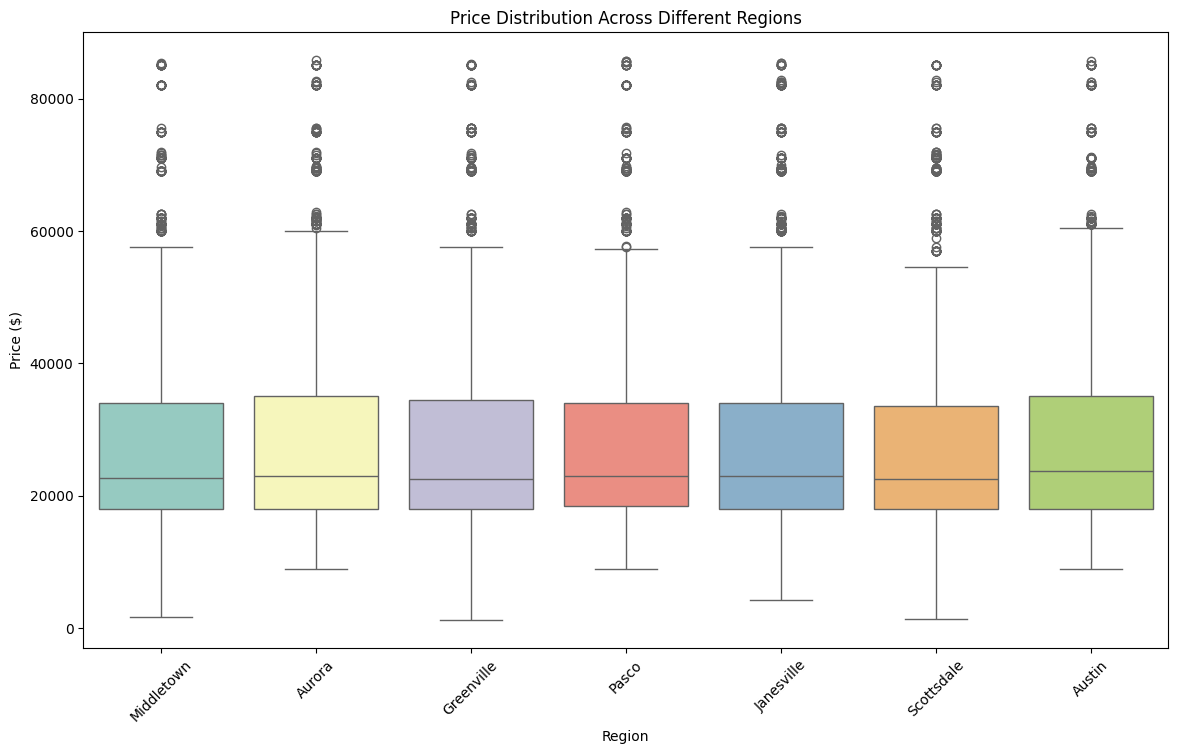

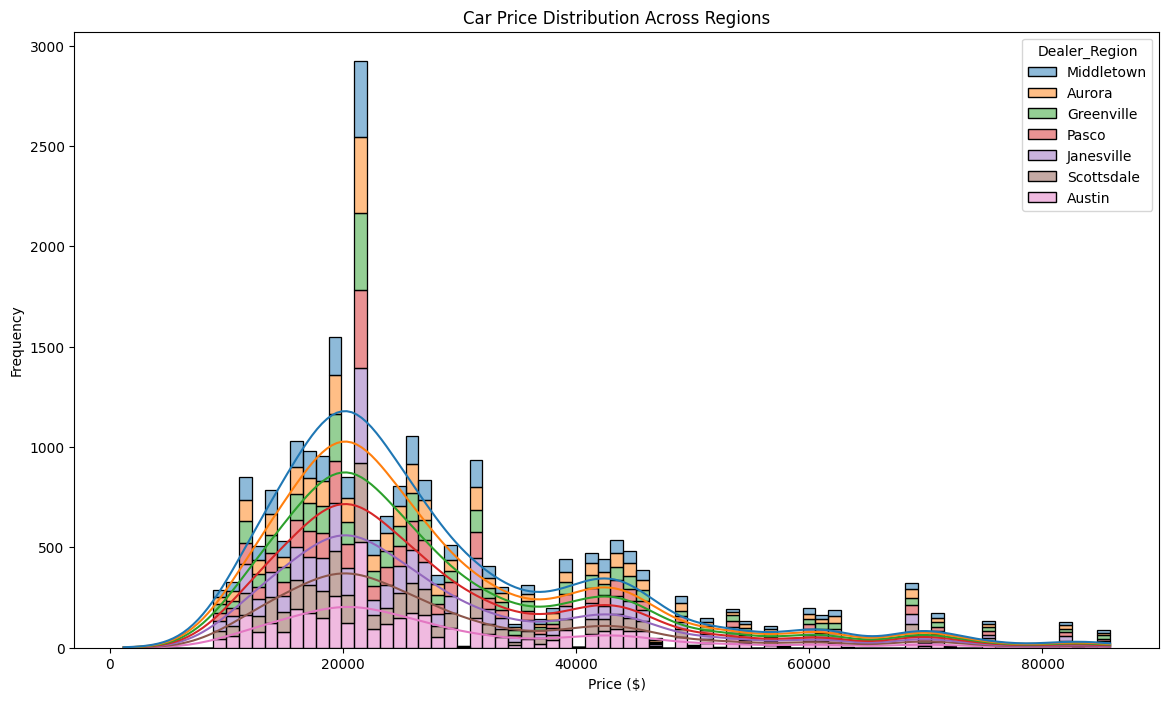


Interpretation:
1. The boxplot highlights the median price, spread, and outliers for each region, showing how prices differ.
2. The histogram provides a layered view of the price distribution across regions, identifying overlaps and regional trends.
3. Regions with wider spreads and outliers may indicate more diverse car offerings or pricing variability.



In [6]:
#Q4 What is the distribution of car prices across different regions ?

# Group data by regions and calculate descriptive statistics for prices
regional_price_stats = df.groupby('Dealer_Region')['Price ($)'].describe()

# Save the statistics to a CSV file
regional_price_stats.to_csv('regional_price_stats.csv')
print("Descriptive statistics for car prices across regions:")
print(regional_price_stats)

# Visualization: Boxplot to show price distribution by region
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette='Set3')
plt.title('Price Distribution Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

# Visualization: Histogram to show the overall price distribution for all regions
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Price ($)', hue='Dealer_Region', kde=True, palette='tab10', multiple='stack')
plt.title('Car Price Distribution Across Regions')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# Interpretation
print("""
Interpretation:
1. The boxplot highlights the median price, spread, and outliers for each region, showing how prices differ.
2. The histogram provides a layered view of the price distribution across regions, identifying overlaps and regional trends.
3. Regions with wider spreads and outliers may indicate more diverse car offerings or pricing variability.
""")

Distribution of cars based on body styles:
  Body Style  Count
0        SUV   6374
1  Hatchback   6128
2      Sedan   4488
3  Passenger   3945
4    Hardtop   2971


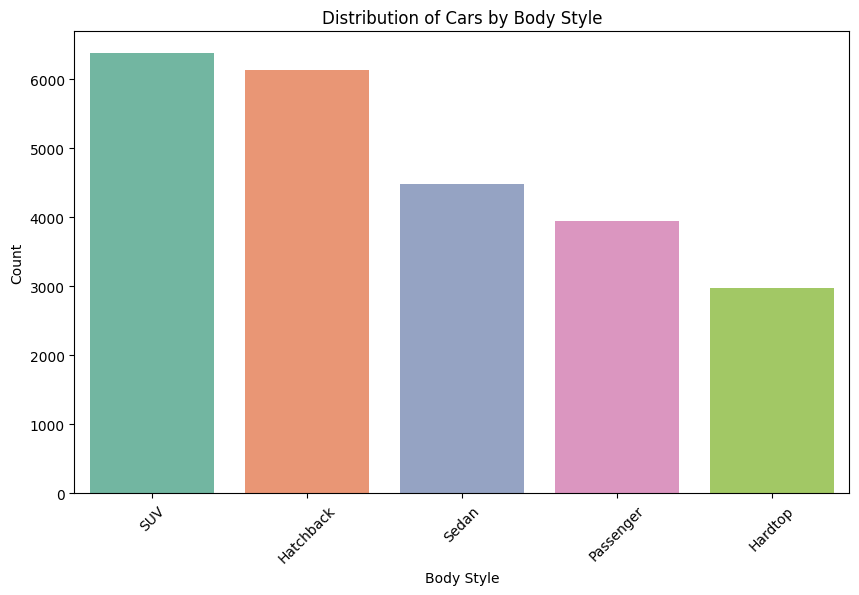

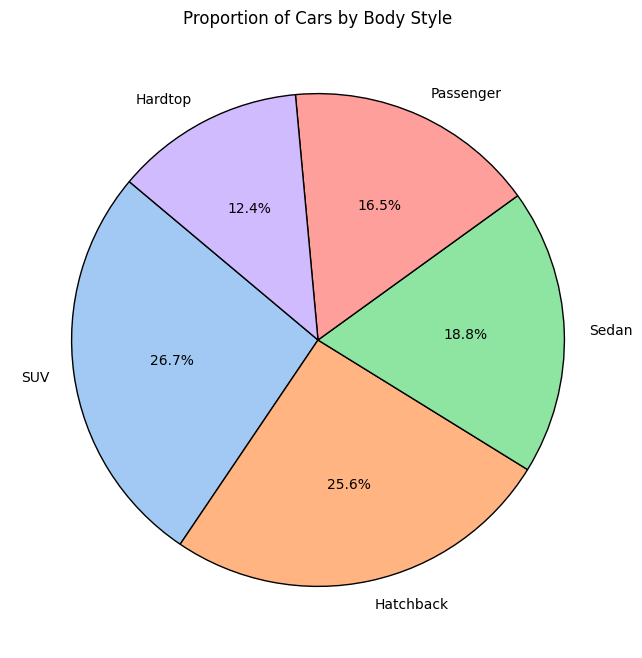


Interpretation:
1. The bar chart shows the number of cars for each body style, highlighting the most and least common styles.
2. The pie chart provides a visual representation of proportions, useful for understanding market segmentation by body style.



In [7]:
#Q5 What is the distribution of cars based on body styles ?

# Calculate the distribution of cars based on body styles
body_style_distribution = df['Body Style'].value_counts()

# Convert to a DataFrame for better handling
body_style_summary = body_style_distribution.reset_index()
body_style_summary.columns = ['Body Style', 'Count']

# Save the result to a CSV file
body_style_summary.to_csv('body_style_distribution.csv', index=False)

# Display the distribution
print("Distribution of cars based on body styles:")
print(body_style_summary)

# Visualization: Bar chart of body styles
plt.figure(figsize=(10, 6))
sns.barplot(data=body_style_summary, x='Body Style', y='Count', palette='Set2')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization: Pie chart of body styles
plt.figure(figsize=(8, 8))
plt.pie(
    body_style_distribution,
    labels=body_style_distribution.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Proportion of Cars by Body Style')
plt.show()

# Interpretation
print("""
Interpretation:
1. The bar chart shows the number of cars for each body style, highlighting the most and least common styles.
2. The pie chart provides a visual representation of proportions, useful for understanding market segmentation by body style.
""")

Average Selling Price by Gender and Income Group:
Income Group          <25k  25k-50k  50k-75k  75k-100k         >100k
Gender                                                              
Female        28132.038732      NaN      NaN       NaN  28318.800352
Male          27816.302247      NaN      NaN   43000.0  28101.413494


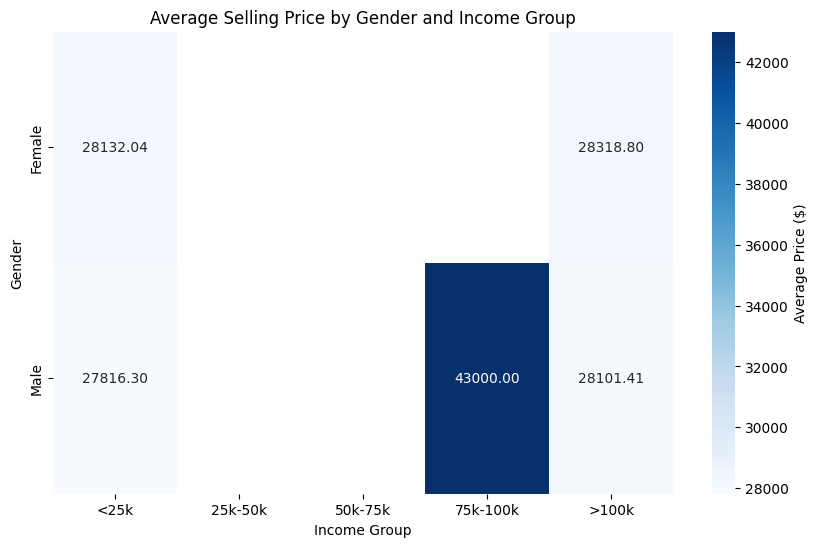

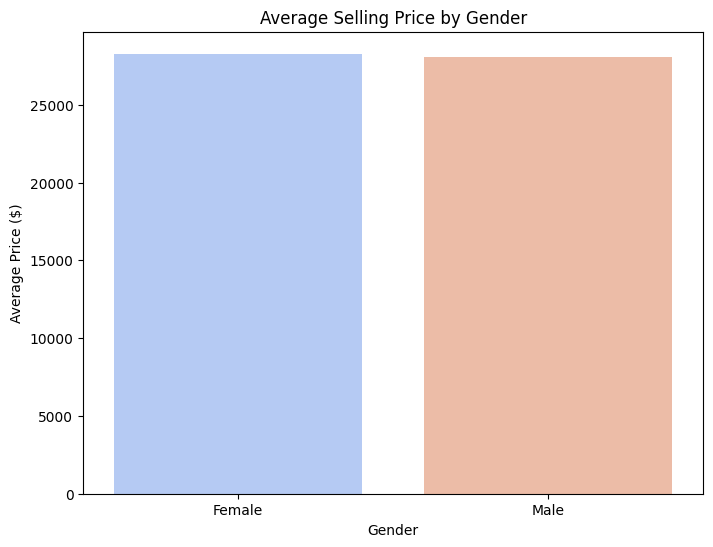


Interpretation:
1. The heatmap shows the interaction between gender and income groups, highlighting how the average car price
   varies for different customer segments.
2. The bar chart illustrates the general trend of car prices by gender.
3. Insights from these visualizations can guide targeted marketing strategies based on customer demographics.



In [8]:
#Q6 How does the average selling price of cars vary by customer gender and annual income ?

# Calculate average price grouped by Gender and Annual Income ranges
# Assuming 'Annual Income' is a continuous numeric column
df['Income Group'] = pd.cut(
    df['Annual Income'],
    bins=[0, 25000, 50000, 75000, 100000, float('inf')],
    labels=['<25k', '25k-50k', '50k-75k', '75k-100k', '>100k']
)

avg_price_gender_income = df.groupby(['Gender', 'Income Group'])['Price ($)'].mean().unstack()

# Save the results to a CSV file
avg_price_gender_income.to_csv('avg_price_gender_income.csv')
print("Average Selling Price by Gender and Income Group:")
print(avg_price_gender_income)

# Visualization: Heatmap to compare prices by gender and income group
plt.figure(figsize=(10, 6))
sns.heatmap(avg_price_gender_income, annot=True, fmt=".2f", cmap='Blues', cbar_kws={'label': 'Average Price ($)'})
plt.title('Average Selling Price by Gender and Income Group')
plt.xlabel('Income Group')
plt.ylabel('Gender')
plt.show()

# Visualization: Bar plot for Gender and Average Price
avg_price_gender = df.groupby('Gender')['Price ($)'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_gender.index, y=avg_price_gender.values, palette='coolwarm')
plt.title('Average Selling Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Price ($)')
plt.show()

# Interpretation
print("""
Interpretation:
1. The heatmap shows the interaction between gender and income groups, highlighting how the average car price
   varies for different customer segments.
2. The bar chart illustrates the general trend of car prices by gender.
3. Insights from these visualizations can guide targeted marketing strategies based on customer demographics.
""")

Distribution of car prices by region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco       

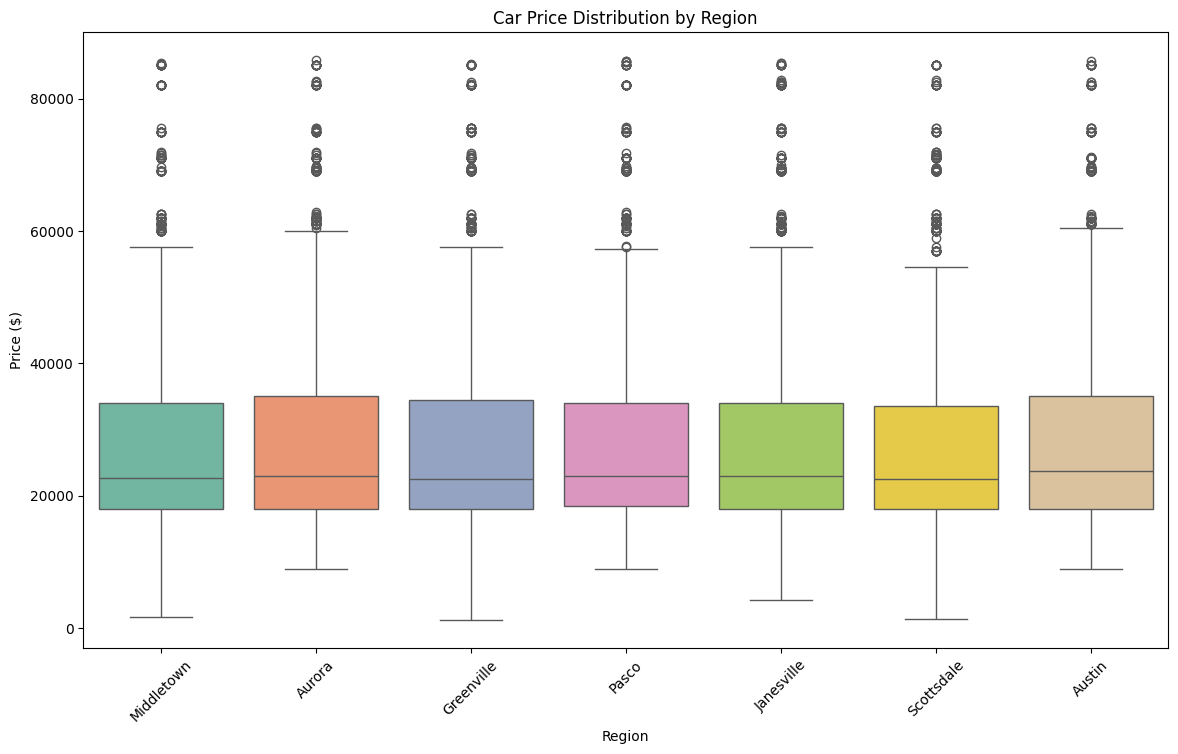

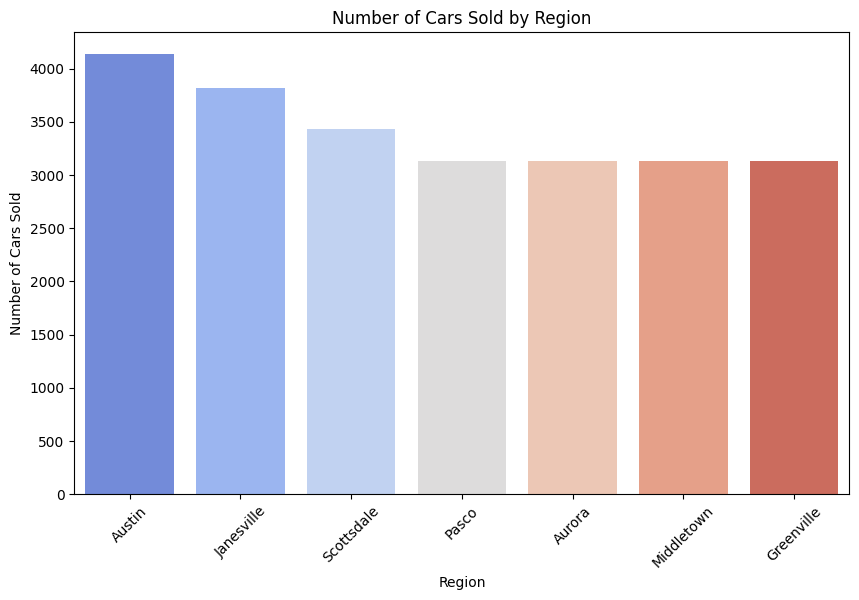


Interpretation:
1. The boxplot shows the price distribution across regions, highlighting the median, spread, and outliers for each region.
2. The bar chart shows the number of cars sold in each region, revealing regional sales patterns.
3. Together, these insights help identify regions with higher price ranges and higher or lower sales volumes.



In [9]:
#Q7 What is the distribution of car prices by region, and how does the number of cars sold vary by region ?
# Calculate the distribution of car prices by region
price_distribution_by_region = df.groupby('Dealer_Region')['Price ($)'].describe()

# Count the number of cars sold per region
cars_sold_by_region = df['Dealer_Region'].value_counts()

# Save results to CSV files
price_distribution_by_region.to_csv('price_distribution_by_region.csv')
cars_sold_by_region.to_csv('cars_sold_by_region.csv')

# Print the results
print("Distribution of car prices by region:")
print(price_distribution_by_region)

print("\nNumber of cars sold by region:")
print(cars_sold_by_region)

# Visualization: Boxplot for car price distribution by region
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette='Set2')
plt.title('Car Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

# Visualization: Bar plot for the number of cars sold by region
plt.figure(figsize=(10, 6))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values, palette='coolwarm')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

# Interpretation
print("""
Interpretation:
1. The boxplot shows the price distribution across regions, highlighting the median, spread, and outliers for each region.
2. The bar chart shows the number of cars sold in each region, revealing regional sales patterns.
3. Together, these insights help identify regions with higher price ranges and higher or lower sales volumes.
""")

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

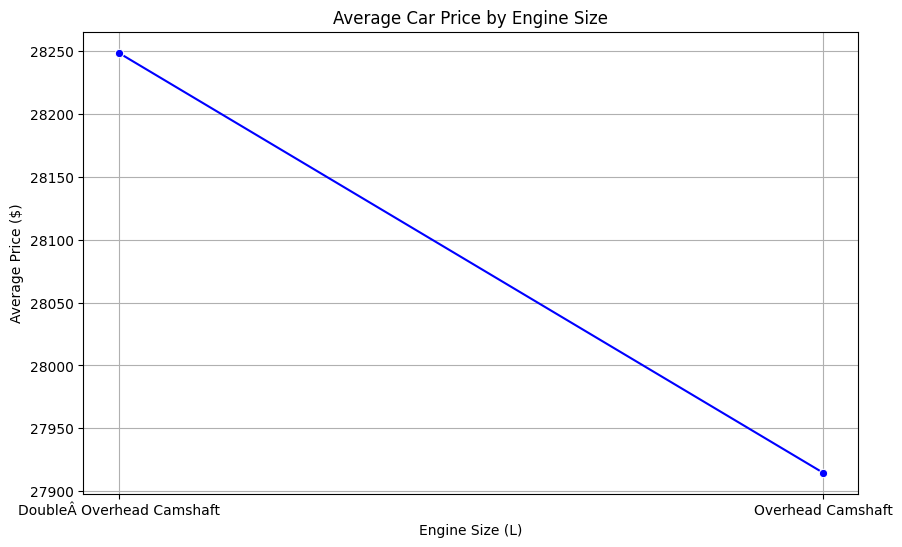


Interpretation:
1. The line plot shows how the average car price increases with engine size, revealing a trend where larger engine sizes
   tend to have higher prices.
2. Larger engine sizes generally correlate with higher car prices due to factors like performance and luxury features.



In [10]:
#Q8 How does the average car price differ between cars with different engine sizes ?
# Check the first few rows of data to understand its structure
print(df.head())

# Calculate the average price for each engine size
average_price_by_engine_size = df.groupby('Engine')['Price ($)'].mean()

# Save the results to a CSV file
average_price_by_engine_size.to_csv('average_price_by_engine_size.csv')

# Display the results
print("Average car price by engine size:")
print(average_price_by_engine_size)

# Visualization: Line plot of average car prices by engine size
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_by_engine_size.index, y=average_price_by_engine_size.values, marker='o', color='b')
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

# Interpretation
print("""
Interpretation:
1. The line plot shows how the average car price increases with engine size, revealing a trend where larger engine sizes
   tend to have higher prices.
2. Larger engine sizes generally correlate with higher car prices due to factors like performance and luxury features.
""")

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

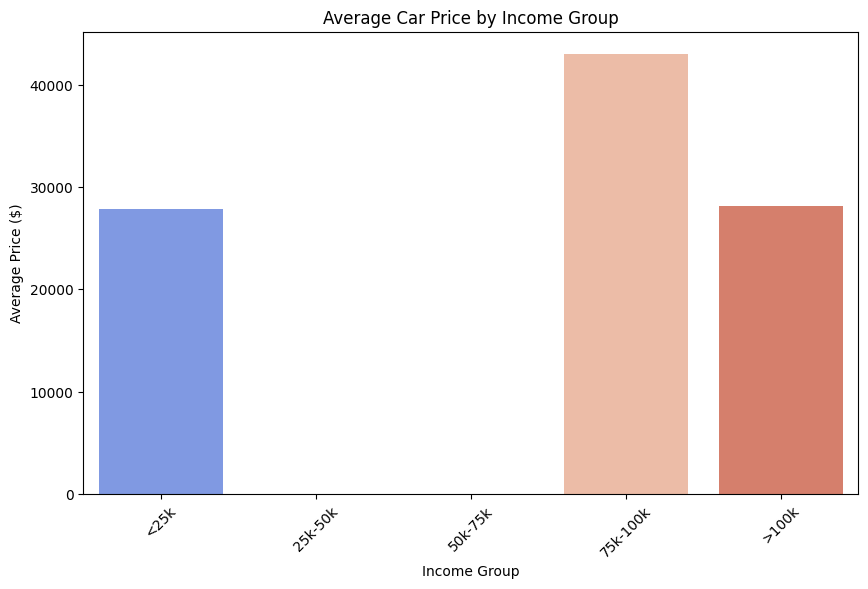


Interpretation:
1. The bar plot shows how the average car price varies across different income brackets, helping us understand the relationship
   between customer income and car prices.
2. Customers with higher incomes tend to purchase cars at higher price points, which may be due to more disposable income or
   the ability to afford premium vehicles.
3. The analysis can guide marketing strategies, identifying which income brackets are more likely to buy higher-priced cars.



In [11]:
#Q9 How do car prices vary based on the customer’s annual income bracket ?
# Check the first few rows of data to understand its structure
print(df.head())

# Create income brackets (you can adjust these values as needed)
df['Income Group'] = pd.cut(
    df['Annual Income'],
    bins=[0, 25000, 50000, 75000, 100000, float('inf')],
    labels=['<25k', '25k-50k', '50k-75k', '75k-100k', '>100k']
)

# Calculate the average price for each income group
average_price_by_income = df.groupby('Income Group')['Price ($)'].mean()

# Save the results to a CSV file
average_price_by_income.to_csv('average_price_by_income.csv')

# Display the results
print("Average car price by income group:")
print(average_price_by_income)

# Visualization: Bar plot of average car prices by income group
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_income.index, y=average_price_by_income.values, palette='coolwarm')
plt.title('Average Car Price by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

# Interpretation
print("""
Interpretation:
1. The bar plot shows how the average car price varies across different income brackets, helping us understand the relationship
   between customer income and car prices.
2. Customers with higher incomes tend to purchase cars at higher price points, which may be due to more disposable income or
   the ability to afford premium vehicles.
3. The analysis can guide marketing strategies, identifying which income brackets are more likely to buy higher-priced cars.
""")

In [12]:
#Q10  What are the top 5 car models with the highest number of sales, and how does their price distribution look ?
# Check the first few rows of data to understand its structure
print(df.head())

# Count the number of sales for each car model
sales_by_model = df['Model'].value_counts()

# Get the top 5 car models with the highest number of sales
top_5_models = sales_by_model.head(5)

# Print top 5 models and their sales
print("Top 5 car models with the highest number of sales:")
print(top_5_models)

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

In [13]:
#Q11  How does car price vary with engine size across different car colors, and which colors have the highest price variation ?
# Check the first few rows of data to understand its structure
print(df.head())

# Calculate the average price and price variation (standard deviation) by engine size and color
price_stats = df.groupby(['Color', 'Engine'])['Price ($)'].agg(['mean', 'std'])

# Reset index for easier plotting
price_stats.reset_index(inplace=True)


# Identify car colors with the highest price variation
max_price_variation = price_stats.groupby('Color')['std'].max()
top_colors_by_variation = max_price_variation.sort_values(ascending=False).head(5)

# Print the top car colors with the highest price variation
print("Top car colors with the highest price variation:")
print(top_colors_by_variation)


         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

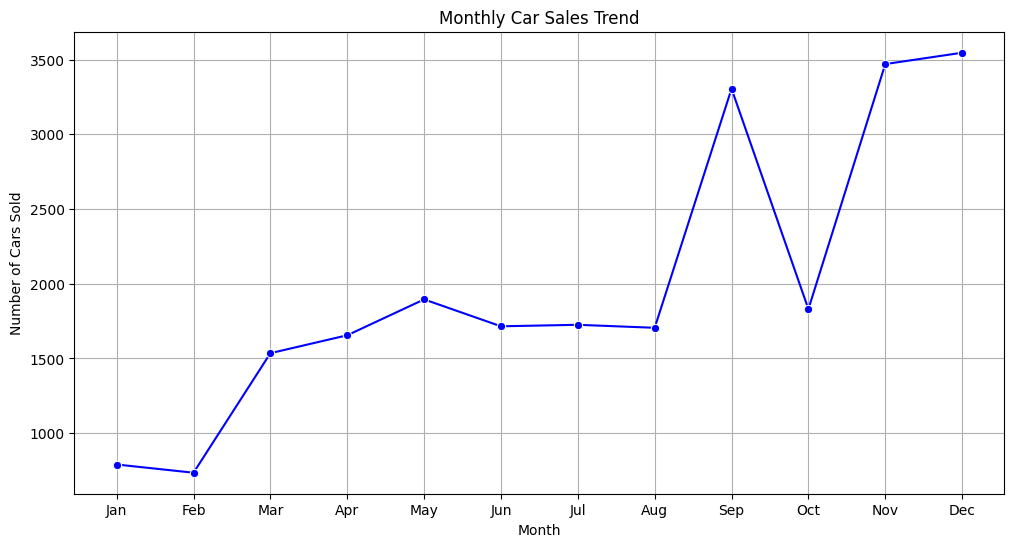

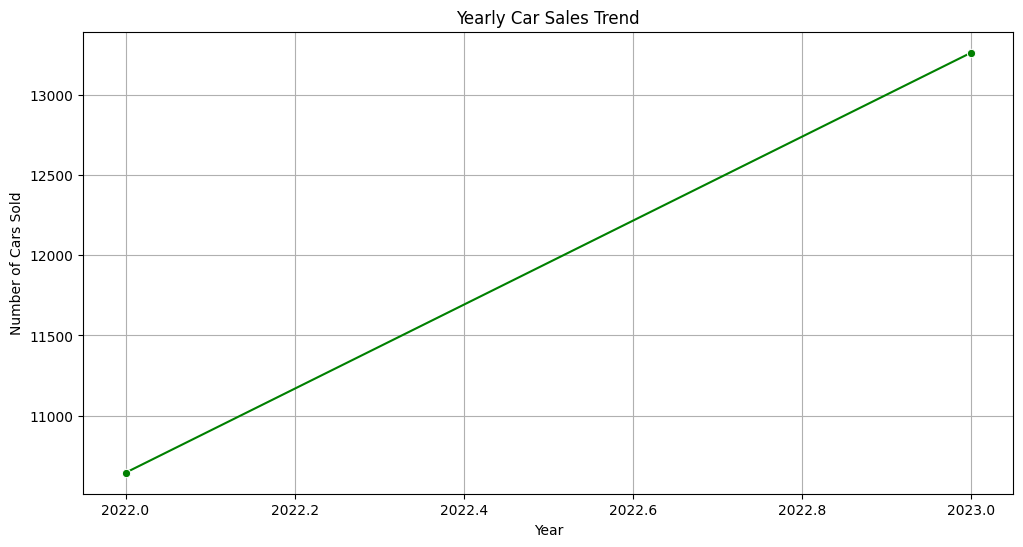


Interpretation:
1. The monthly sales plot shows how car sales fluctuate throughout the year. Peaks during certain months may indicate seasonality (e.g., higher sales in spring or holiday seasons).
2. The yearly sales trend provides insight into long-term growth or decline in car sales.
3. A seasonal trend in sales can help predict demand and plan marketing or inventory strategies.



In [14]:
#Q12  Is there any seasonal trend in car sales based on the date of sale ?
 # Check the first few rows of data to understand its structure
print(df.head())

# Convert the 'Date of Sale' column to datetime (replace 'Date of Sale' with actual column name if different)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract the month and year from the 'Date of Sale' to analyze seasonal trends
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Count the number of cars sold each month
monthly_sales = df.groupby('Month').size()

# Count the number of cars sold each year (for trend analysis over multiple years)
yearly_sales = df.groupby('Year').size()

# Visualization: Line plot of monthly car sales
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(monthly_sales.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Visualization: Line plot of yearly car sales to check long-term trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o', color='g')
plt.title('Yearly Car Sales Trend')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.grid(True)
plt.show()

# Interpretation
print("""
Interpretation:
1. The monthly sales plot shows how car sales fluctuate throughout the year. Peaks during certain months may indicate seasonality (e.g., higher sales in spring or holiday seasons).
2. The yearly sales trend provides insight into long-term growth or decline in car sales.
3. A seasonal trend in sales can help predict demand and plan marketing or inventory strategies.
""")

         Car_id       Date Customer Name Gender  Annual Income  \
0  C_CND_000001 2022-01-02     Geraldine   Male          13500   
1  C_CND_000002 2022-01-02           Gia   Male        1480000   
2  C_CND_000003 2022-01-02        Gianna   Male        1035000   
3  C_CND_000004 2022-01-02       Giselle   Male          13500   
4  C_CND_000005 2022-01-02         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black     

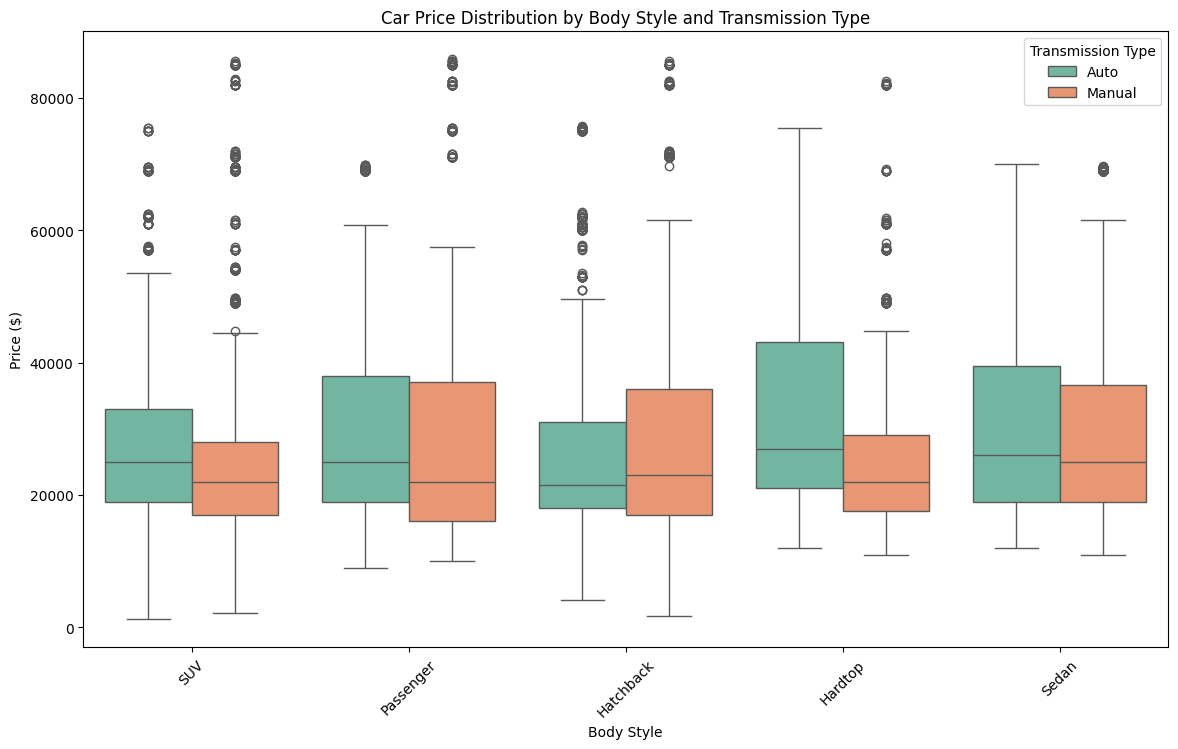

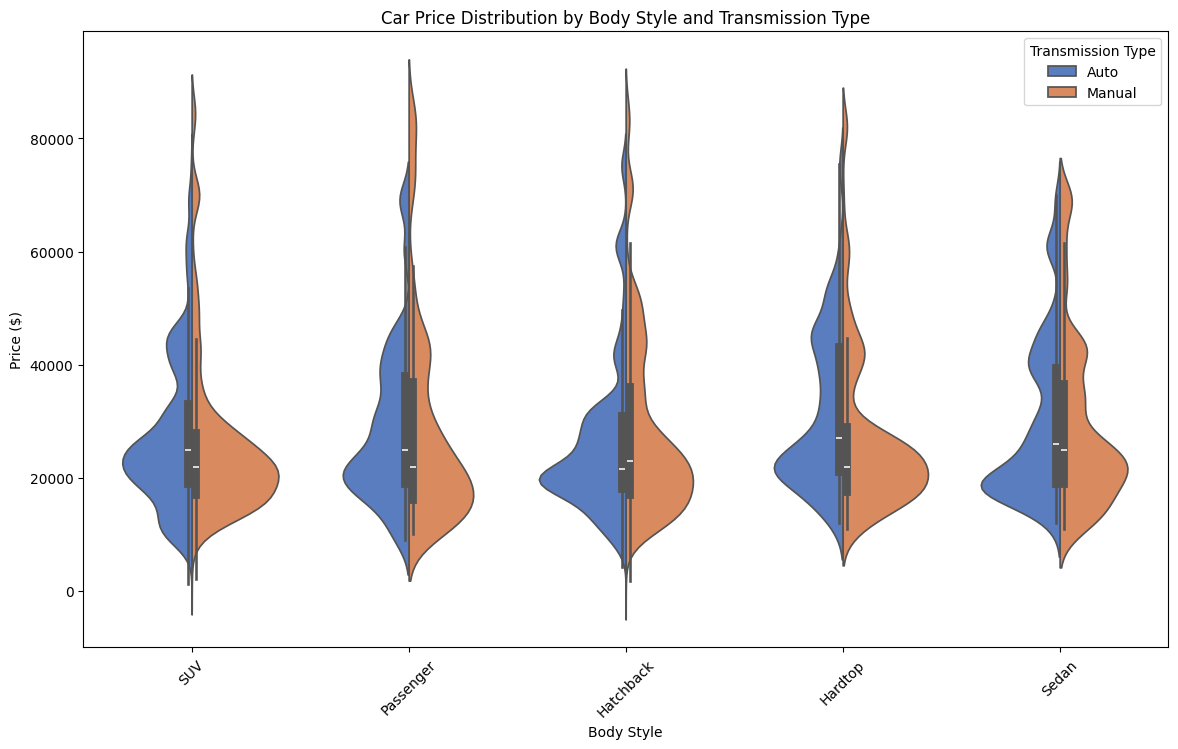


Interpretation:
1. The boxplot shows the price distribution for each combination of body style and transmission type, highlighting median prices,
   interquartile ranges (IQR), and potential outliers.
2. The violin plot provides a richer visualization of the price distribution, showing the density of car prices across different body 
   styles and transmission types.
3. Different body styles and transmission types may have varying price distributions, helping to understand which combinations are 
   associated with higher or lower car prices.



In [15]:
#Q13  How does the car price distribution change when considering different combinations of body style and transmission type ?
# Check the first few rows of data to understand its structure
print(df.head())

# Visualization: Boxplot for price distribution by body style and transmission type
plt.figure(figsize=(14, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette='Set2')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Transmission Type')
plt.show()

# Visualization: Violin plot for price distribution by body style and transmission type
plt.figure(figsize=(14, 8))
sns.violinplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, split=True, palette='muted')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Transmission Type')
plt.show()

# Interpretation
print("""
Interpretation:
1. The boxplot shows the price distribution for each combination of body style and transmission type, highlighting median prices,
   interquartile ranges (IQR), and potential outliers.
2. The violin plot provides a richer visualization of the price distribution, showing the density of car prices across different body
   styles and transmission types.
3. Different body styles and transmission types may have varying price distributions, helping to understand which combinations are
   associated with higher or lower car prices.
""")

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
Income Group     0
Month            0
Year             0
dtype: int64
Car_id                   object
Date             datetime64[ns]
Customer Name            object
Gender                   object
Annual Income             int64
Dealer_Name              object
Company                  object
Model                    object
Engine                  float64
Transmission             object
Color                    object
Price ($)                 int64
Dealer_No                object
Body Style               object
Phone                     int64
Dealer_Region            object
Income Group           category
Month                     int32
Year                      int32
dtype: object
    

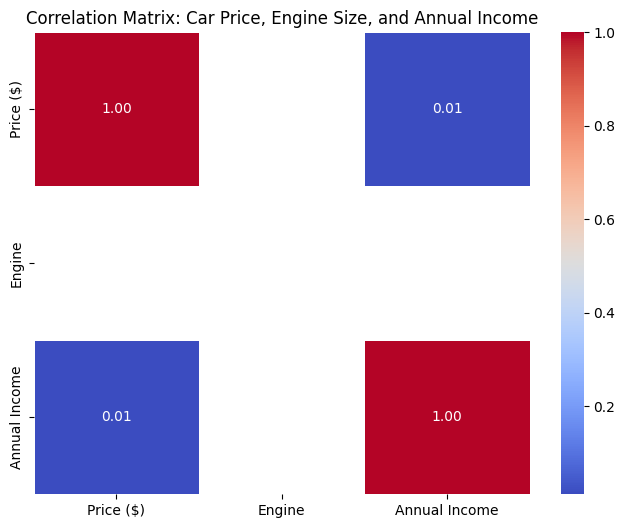

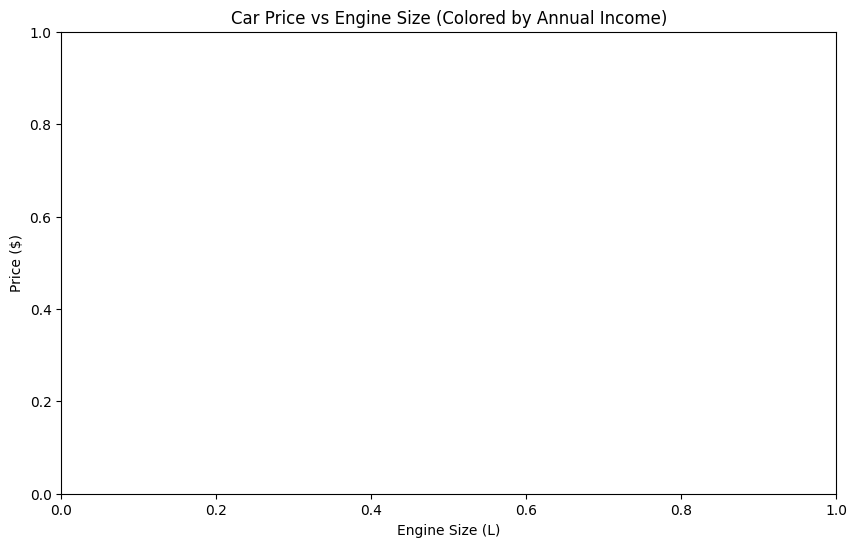

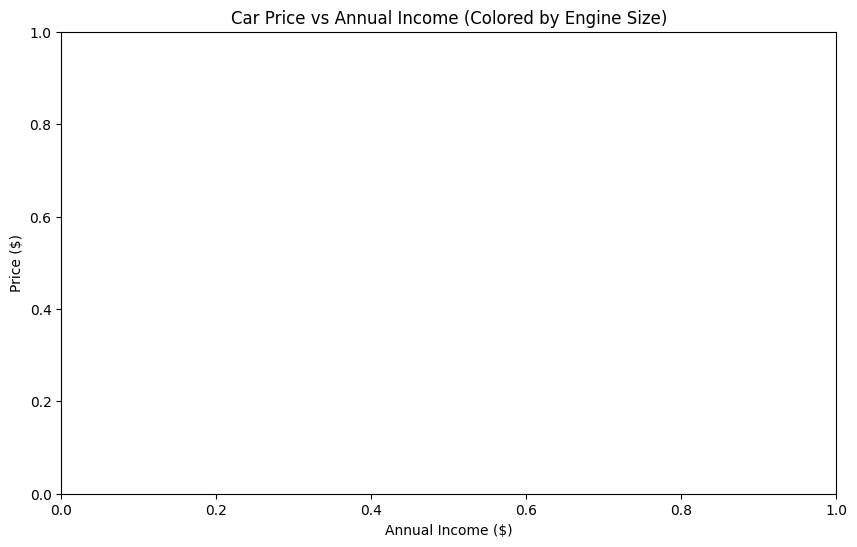

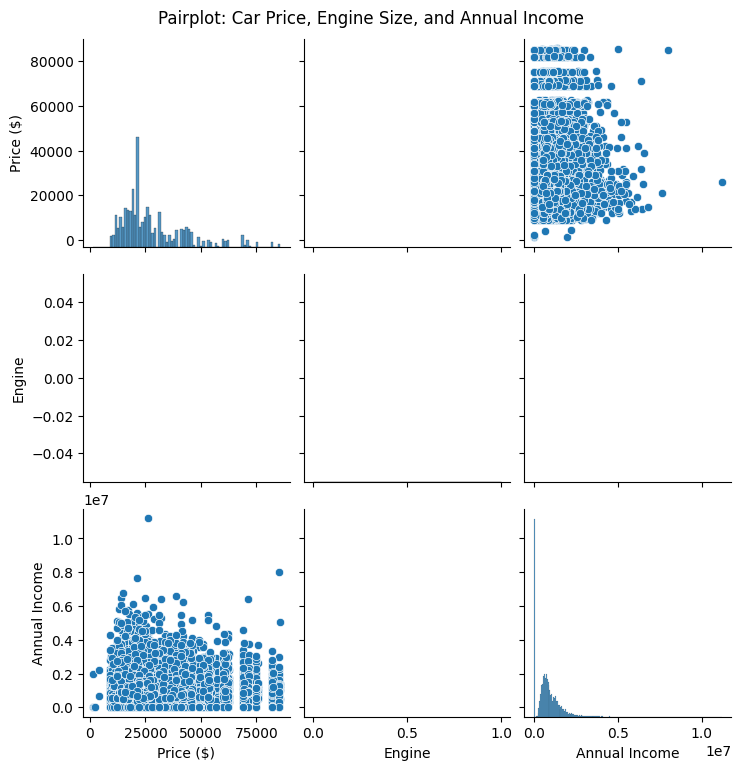


Interpretation:
1. The correlation matrix will show how strongly car price, engine size, and annual income are related.
   Values close to 1 or -1 indicate strong positive or negative correlations, while 0 indicates no correlation.
2. The scatter plots show how car prices vary with engine size and annual income, and highlight interactions.
   - Car price vs Engine size will help see how larger engines correlate with higher prices.
   - Car price vs Annual income will indicate if wealthier customers tend to purchase more expensive cars.
3. The pairplot will provide a comprehensive view of the relationships between all three features.



In [16]:
#Q14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact ?

# Check for missing values and handle them (if any)
print(df.isnull().sum())

# Convert the relevant columns to numeric (float) if they are in string format
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')

# Check the types of the columns after conversion
print(df.dtypes)

# Calculate the correlation matrix for 'Price ($)', 'Engine Size (L)', and 'Annual Income ($)'
correlation_data = df[['Price ($)', 'Engine', 'Annual Income']].corr()

# Display the correlation matrix
print(correlation_data)


# Display the correlation matrix
print(correlation_data)

# Visualization: Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Car Price, Engine Size, and Annual Income')
plt.show()

# Scatter plot: Car price vs Engine size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine', y='Price ($)', data=df, hue='Annual Income', palette='viridis')
plt.title('Car Price vs Engine Size (Colored by Annual Income)')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price ($)')
plt.show()

# Scatter plot: Car price vs Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=df, hue='Engine', palette='coolwarm')
plt.title('Car Price vs Annual Income (Colored by Engine Size)')
plt.xlabel('Annual Income ($)')
plt.ylabel('Price ($)')
plt.show()

# Pair plot to explore relationships between all three variables
sns.pairplot(df[['Price ($)', 'Engine', 'Annual Income']])
plt.suptitle('Pairplot: Car Price, Engine Size, and Annual Income', y=1.02)
plt.show()

# Interpretation
print("""
Interpretation:
1. The correlation matrix will show how strongly car price, engine size, and annual income are related.
   Values close to 1 or -1 indicate strong positive or negative correlations, while 0 indicates no correlation.
2. The scatter plots show how car prices vary with engine size and annual income, and highlight interactions.
   - Car price vs Engine size will help see how larger engines correlate with higher prices.
   - Car price vs Annual income will indicate if wealthier customers tend to purchase more expensive cars.
3. The pairplot will provide a comprehensive view of the relationships between all three features.
""")

In [17]:
#Q15 How does the average car price vary across different car models and engine types?
# Convert relevant columns to numeric (if they are in string format) to ensure accuracy
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

# Group by car model and engine type, then calculate the average price for each group
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Sort the results to see which combinations have higher average prices
avg_price_by_model_engine_sorted = avg_price_by_model_engine.sort_values(by='Price ($)', ascending=False)

# Display the result
print(avg_price_by_model_engine_sorted)

Empty DataFrame
Columns: [Model, Engine, Price ($)]
Index: []
